<a href="https://colab.research.google.com/github/AlejandroAlberoni/treinamento-h2ia/blob/main/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**K-means** is an unsupervisioned machine learning technique. Given total number of clusters, it set data to the closest centroid and then re-calculates the baricenter(a.k.a centroid) till no baricenter relocation is needed.

**This notebook uses k-means to cluster the Fisher's iris dataset.**

In [1]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as mpl
from copy import deepcopy
import pandas
import numpy
import random
import math

In [2]:
iris_rawdata = load_iris()
iris_df = pandas.DataFrame(iris_rawdata['data'])
pca = PCA(n_components=2)
final_components = pca.fit_transform(iris_df)
fc_df = pandas.DataFrame(final_components)

In [3]:
class Kmeans:
    def __init__(self, data, centroids):
        self.data = deepcopy(data)
        self.centroids = centroids
        self.datamap_to_centroids = [0 for i in range(len(self.data))]
        self.centroids_coordinates = None
        self.last_centroid_is_not_equal = 1

    def get_random_centroids(self):
        x_min, x_max = self.data[0].min(), self.data[0].max()
        y_min, y_max = self.data[1].min(), self.data[1].max()
        self.centroids_coordinates = [[random.uniform(x_min, x_max), random.uniform(y_min, y_max)] for i in range(self.centroids)]

    def perform(self):
        self.get_random_centroids()
        while self.last_centroid_is_not_equal:
            self.assign_data_to_centroids()
            self.adjust_centroids()
        self.show_map()

    def get_distance_from_centroid(self, point, centroid):
        distance = math.sqrt(pow(point[0] - centroid[0], 2) + pow(point[1] - centroid[1], 2))
        return distance

    def assign_data_to_centroids(self):
        for i, row in self.data.iterrows():
            point_to_all_centroids = []
            for j in self.centroids_coordinates:
                point_to_all_centroids.append(self.get_distance_from_centroid([row[0], row[1]], j))
            self.datamap_to_centroids[i] = numpy.argmin(point_to_all_centroids)
        self.data['group'] = self.datamap_to_centroids

    def adjust_centroids(self):
        new_centroids = []
        for i, v in enumerate(self.centroids_coordinates):
            subset = self.data[self.data['group'] == i]
            x_mean, y_mean = subset.mean(axis='index')[0], subset.mean(axis='index')[1]
            new_centroids.append([x_mean, y_mean])
        if new_centroids == self.centroids_coordinates:
            self.last_centroid_is_not_equal = 0
        self.centroids_coordinates = deepcopy(new_centroids)

    def show_map(self):
        colors = ['red', 'yellow', 'blue']
        map_colors = [colors[i] for i in self.data['group'].to_list()]
        mpl.scatter(self.data[0], self.data[1], c=map_colors)
        mpl.show()

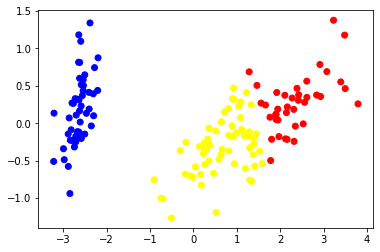

In [4]:
kmeans = Kmeans(data=fc_df, centroids=3)
kmeans.perform()